## Observations and Insights 

* There is a strong positive correlation between tumor volume and weight.
* The most promising drug regimems are Ramicane, Naftisol, Ceftamin, and Infubinol.
* The Ceftamin regimen has the largest IQR, suggesting variable treatment outcome.

In [1]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID")
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
mouse_count = merge_df.shape[0]
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_count = merge_df["Mouse ID"].nunique()
mice_count


249

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_merge_df = merge_df.drop_duplicates(subset='Mouse ID', keep="last")
new_merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [6]:
# Checking the number of mice in the clean DataFrame.

new_mouse_count = len(merge_df["Mouse ID"].unique())
print(new_mouse_count)

249


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

mean_mouse = merge_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_mouse = merge_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
sd_mouse = merge_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
var_mouse = merge_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
sem_mouse = merge_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary_stats = pd.DataFrame({"Mean of Tumor Volume": mean_mouse,
                              "Median of Tumor Volume":median_mouse,
                              "STD of Tumor Volume":sd_mouse,
                              "Variance of Tumor Volume":var_mouse,
                              "SEM of Tumor Volume":sem_mouse})
summary_stats


,Mean of Tumor Volume,Median of Tumor Volume,STD of Tumor Volume,Variance of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.322552,50.854632,6.507770,42.351070,0.512884
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


## Bar Plots

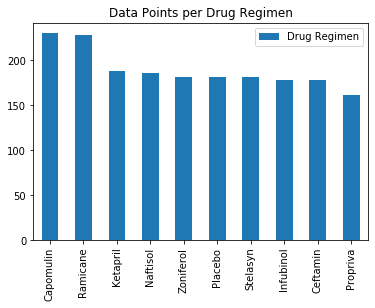

<Figure size 432x288 with 0 Axes>

In [8]:
# # Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.


# treatmentdf = merge_df.drop_duplicates(subset='Drug Regimen', keep="last")
# treatmentdf.head()

# treament_plot = treatmentdf.plot.bar(x='Drug Regimen',y='Timepoint', rot = 30)

# plot= merge_df.plot.bar(x = 'Drug Regimen', y = len('Drug Regimen'), rot = 30)

# drugs_total = pd.value_counts(merge_df['Drug Regimen'])
# drugs_total

drugs_total = pd.DataFrame(pd.value_counts(merge_df["Drug Regimen"]))
drugs_total

drugs_total.plot(kind="bar")
plt.title("Data Points per Drug Regimen")
plt.show()
plt.tight_layout()


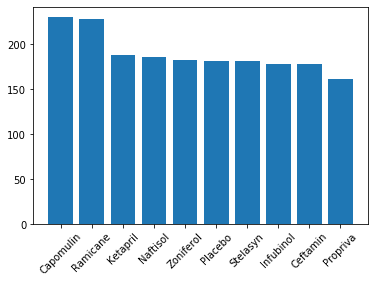

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = merge_df["Drug Regimen"].value_counts().index
y_axis = merge_df["Drug Regimen"].value_counts()
plt.bar(x_axis,y_axis)
plt.xticks(rotation = 45)
plt.show()


## Pie Plots

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_total = pd.DataFrame(pd.value_counts(merge_df['Sex']))
gender_total

,Sex
Male,958
Female,935


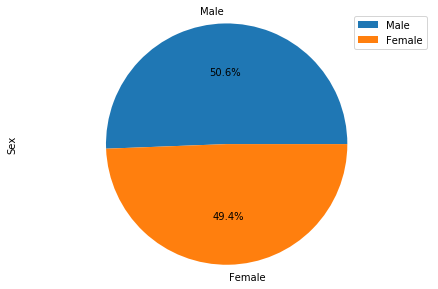

In [11]:
gender_pandas = gender_total.plot(kind="pie", y="Sex", autopct='%1.1f%%')
gender_pandas.set_ylabel("Sex")
plt.tight_layout()
plt.axis("equal")
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [125, 124]
colors = ["blue","pink"]


([<matplotlib.patches.Wedge at 0x20cabbb41c8>,
 [Text(-0.7017365844029831, -0.8470925369228767, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.3827654096743544, -0.4620504746852054, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

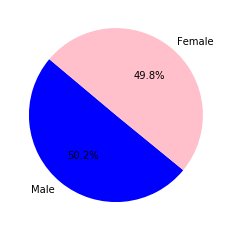

In [13]:
plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=140)

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin = new_merge_df.loc[new_merge_df["Drug Regimen"] == "Capomulin"]
Ramicane = new_merge_df.loc[new_merge_df["Drug Regimen"] == "Ramicane"]
Infubinol = new_merge_df.loc[new_merge_df["Drug Regimen"] == "Infubinol"]
Ceftamin = new_merge_df.loc[new_merge_df["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

quartiles = x_axisCa.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(quartiles)
print(lowerq)
print(upperq)
print(iqr)

lower_boundca = lowerq - (1.5*iqr)
upper_boundca = upperq + (1.5*iqr)
print(f"Values below {lower_boundca} could be outliers.")
print(f"Values above {upper_boundca} could be outliers.")

0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
32.37735684
40.1592203
7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [24]:
quartilesr = x_axisR.quantile([.25,.5,.75])
lowerr = quartilesr[0.25]
upperr = quartilesr[0.75]
iqrr = upperr-lowerr
print(quartilesr)
print(lowerr)
print(upperr)
print(iqrr)

lower_boundr = lowerr - (1.5*iqrr)
upper_boundr = upperr + (1.5*iqrr)
print(f"Values below {lower_boundr} could be outliers.")
print(f"Values above {upper_boundr} could be outliers.")

0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
31.56046955
40.65900627
9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [26]:
quartilesi = x_axisI.quantile([.25,.5,.75])
loweri = quartilesi[0.25]
upperi = quartilesi[0.75]
iqri = upperi-loweri
print(quartilesi)
print(loweri)
print(upperi)
print(iqri)

lower_boundi = loweri - (1.5*iqri)
upper_boundi = upperi + (1.5*iqri)
print(f"Values below {lower_boundi} could be outliers.")
print(f"Values above {upper_boundi} could be outliers.")

0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
54.04860769
65.52574285
11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [27]:
quartilesce = x_axisCe.quantile([.25,.5,.75])
lowerce = quartilesce[0.25]
upperce = quartilesce[0.75]
iqrce = upperce-lowerce
print(quartilesce)
print(lowerce)
print(upperce)
print(iqrce)

lower_boundce = lowerce - (1.5*iqrce)
upper_boundce = upperce + (1.5*iqrce)
print(f"Values below {lower_boundce} could be outliers.")
print(f"Values above {upper_boundce} could be outliers.")

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
48.72207785
64.29983003
15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


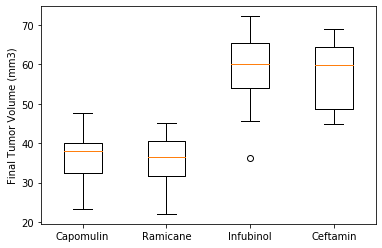

In [28]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

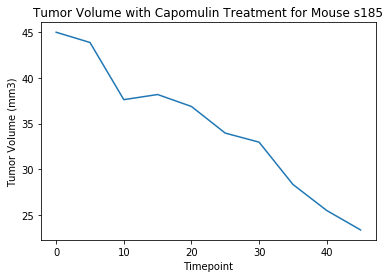

In [19]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

x_axis = merge_df.loc[merge_df["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = merge_df.loc[merge_df["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin Treatment for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse_weight_capomulin = new_merge_df.loc[new_merge_df["Drug Regimen"] == "Capomulin"]
mouse_weight_capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3


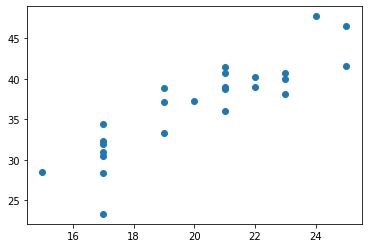

In [31]:
mouse_weight = mouse_weight_capomulin["Weight (g)"]
tumor_volume = mouse_weight_capomulin["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)

## Correlation and Regression

The Correlation between mouse weight and tumor volume it 0.88


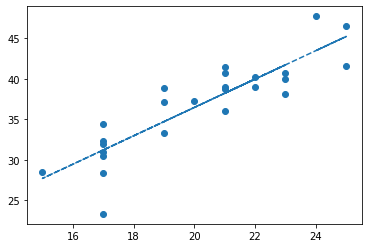

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(mouse_weight, tumor_volume)
print(f"The Correlation between mouse weight and tumor volume it {round(correlation[0],2)}")

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, fit, "--")